In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv('weather.csv')

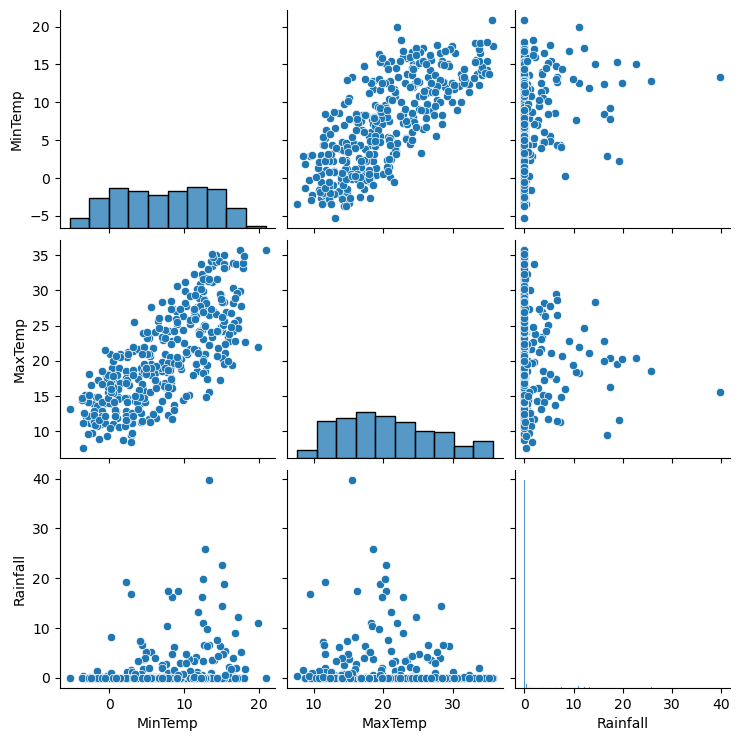

In [11]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

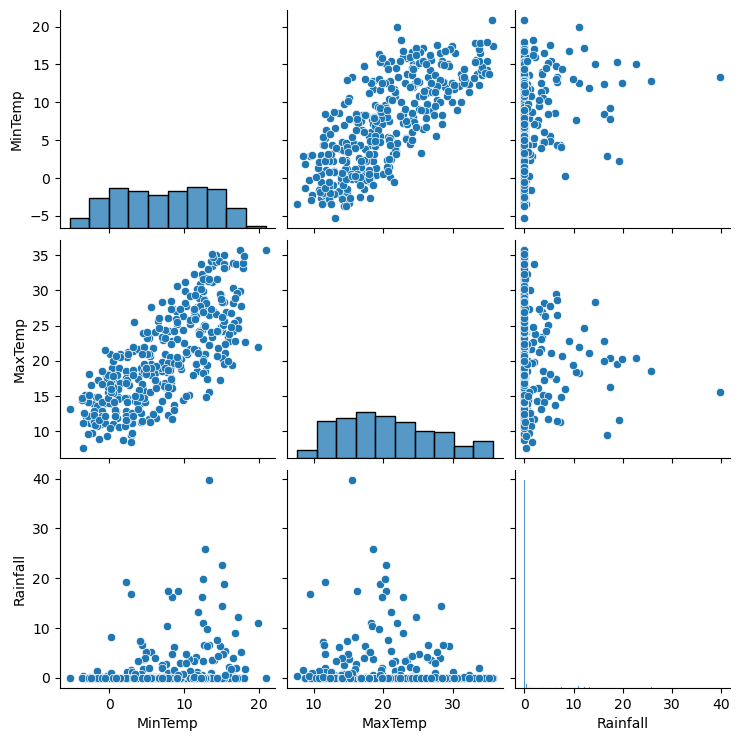

Error: 'Date' column not found in the DataFrame.
Error: Monthly average maximum temperature data not available.
Mean Squared Error for Rainfall Prediction: 37.076845600582615
Error: 'Month' column not found in the DataFrame.


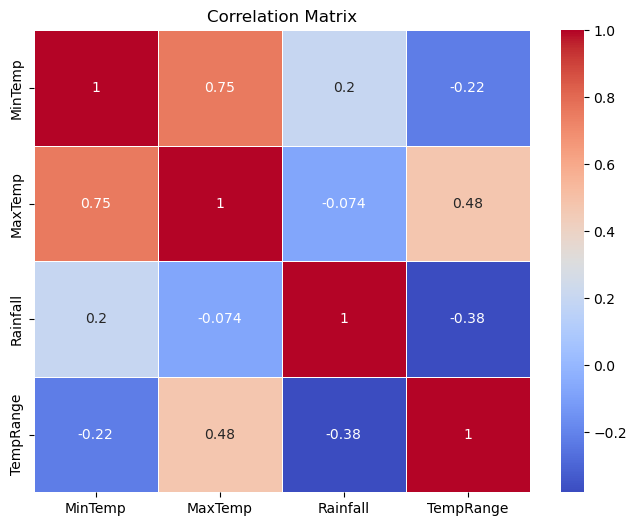

Mean Squared Error for MaxTemp Prediction: 16.56137509100792


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
df = pd.read_csv('weather.csv')

# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

# Step 4: Feature Engineering (if needed)
# Example: Feature Engineering to create a new feature 'TempRange' representing the temperature range
df['TempRange'] = df['MaxTemp'] - df['MinTemp']

# Step 5: Data Analysis (analyze each term)
# Example: Calculate average MaxTemp by month
if 'Date' in df.columns:  # Check if 'Date' column exists
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()
else:
    print("Error: 'Date' column not found in the DataFrame.")
    monthly_avg_max_temp = None  # Define monthly_avg_max_temp as None if 'Date' column doesn't exist

# Step 6: Data Visualization (Part 2)
if monthly_avg_max_temp is not None:  # Check if monthly_avg_max_temp is defined
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Max Temperature')
    plt.title('Monthly Average Max Temperature')
    plt.grid(True)
    plt.show()
else:
    print("Error: Monthly average maximum temperature data not available.")

# Step 7: Advanced Analysis (e.g., predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

# Step 8: Conclusions and Insights (analyze each term)
# Example: Identify the highest and lowest rainfall months
if 'Month' in df.columns:  # Check if 'Month' column exists
    highest_rainfall_month = monthly_avg_max_temp.idxmax()
    lowest_rainfall_month = monthly_avg_max_temp.idxmin()
    print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')
else:
    print("Error: 'Month' column not found in the DataFrame.")
# Additional analysis: Explore the correlation between features using heatmap
correlation_matrix = df[['MinTemp', 'MaxTemp', 'Rainfall', 'TempRange']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Additional prediction: Predict MaxTemp based on MinTemp and Rainfall
X_temp = df[['MinTemp', 'Rainfall']]
y_temp = df['MaxTemp']
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
model_temp = LinearRegression()
model_temp.fit(X_train_temp, y_train_temp)
y_pred_temp = model_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print(f'Mean Squared Error for MaxTemp Prediction: {mse_temp}')